In [1]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import matplotlib
import uuid
import logging
import numpy as np
from functools import partial
from agents_experiments import (IdleAgent, ControlledAgent, interact)
from pprint import pprint
from time import perf_counter

matplotlib.rc('font', size=14)
logger = logging.getLogger()

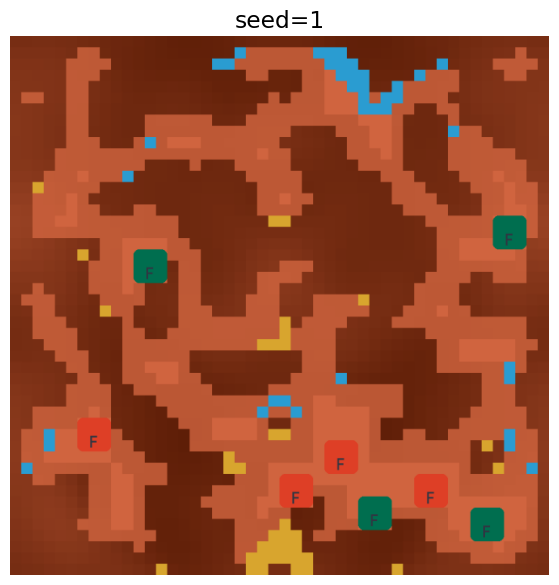

In [2]:
tic = perf_counter()
env = LuxAI_S2()
seed = 1
obs = env.reset(seed=seed)
plotname = str(uuid.uuid4()) + '.png'
file_path = '/home/adrian_admin/prog/kaggle/lux-ai-2/Lux-Design-S2/data/experiments/adrian/images/'
animate_arg = ''  # file_path + filename
f, ax = plt.subplots(figsize=(8, 7))
agents = {}
controlled_agent_ = partial(IdleAgent, radius=130, threshold=10)
for player, agent_constructor in zip(env.agents, [controlled_agent_, controlled_agent_]):
    logging.debug(player)
    agents[player] = agent_constructor(player, env.state.env_cfg) 

last_obs = interact(
    env, 
    agents, 
    11, 
    animate_=animate_arg, 
    break_at_first_action=False, 
    debug=False, 
    custom_board=None,  #simple_board
    seed=seed
)

img = env.render("rgb_array", width=640, height=640)
ax.imshow(img);
ax.axis('off');
ax.set_title('seed={}'.format(seed))
logging.info('iteration seed {} took {} seconds'.format(seed, perf_counter() - tic))
# f.savefig(file_path + plotname)
# print(file_path + plotname)

In [3]:
# logger.setLevel(logging.INFO)
# NUM_SEEDS = 9
# assert NUM_SEEDS % 3 == 0, "NUM_SEEDS should be a multiple of 3"
# half = NUM_SEEDS // 3
# f, axes = plt.subplots(half, 3, figsize=(15, 5 * half))

# for seed, ax in enumerate(axes.ravel()):
#     tic = perf_counter()
#     env = LuxAI_S2()
#     obs = env.reset(seed=seed)

#     plotname = str(uuid.uuid4()) + '.png'
#     file_path = '/home/adrian_admin/prog/kaggle/lux-ai-2/Lux-Design-S2/data/experiments/adrian/images/'
#     animate_arg = ''  # file_path + filename

#     agents = {}
#     controlled_agent_ = partial(IdleAgent, radius=130, threshold=0)
#     for player, agent_constructor in zip(env.agents, [controlled_agent_, controlled_agent_]):
#         logging.debug(player)
#         agents[player] = agent_constructor(player, env.state.env_cfg) 

#     last_obs = interact(
#         env, 
#         agents, 
#         10, 
#         animate_=animate_arg, 
#         break_at_first_action=False, 
#         debug=False, 
#         custom_board=None,  #simple_board
#         seed=seed
#     )
    
#     img = env.render("rgb_array", width=640, height=640)
#     ax.imshow(img);
#     ax.axis('off');
#     ax.set_title('seed={}'.format(seed))
#     logging.info('iteration seed {} took {} seconds'.format(seed, perf_counter() - tic))
# f.savefig(file_path + plotname)
# print(file_path + plotname)
# if NUM_SEEDS > 3:
#     plt.close(f);